# MLOps Zoomcamp - 01 Intro - Homework

The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.

## 1. Librerias necesarias

In [1]:
#!pip install pyarrow

## 2. Importaciones

In [2]:
import pandas as pd
import sklearn
from tqdm import tqdm
tqdm.pandas()
import seaborn as sns
pd.options.display.float_format = '{:20,.2f}'.format

from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

## Ingesta de datos:

* Se realiza la lectura de datos desde la url: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
* We'll use the same NYC taxi dataset, but instead of "Green Taxi Trip Records", we'll use "Yellow Taxi Trip Records".

In [3]:
df_jan23 = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet")
df_feb23 = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet")

### Q1. Downloading the data
**Read the data for January. How many columns are there?**

In [4]:
df_jan23.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [5]:
columns = len(df_jan23.columns)
columns

19

### Q2. Computing duration
**Now let's compute the duration variable. It should contain the duration of a ride in minutes**

**What's the standard deviation of the trips duration in January?**

In [6]:
df_jan23["duration"] = df_jan23['tpep_dropoff_datetime'] - df_jan23['tpep_pickup_datetime']
df_jan23['duration'] = df_jan23["duration"].progress_apply(lambda td: td.total_seconds()/60)
df_jan23["duration"].std()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3066766/3066766 [00:16<00:00, 181170.99it/s]


42.594351241920904

### Q3. Dropping outliers
**Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).**

**What fraction of the records left after you dropped the outliers?**

<AxesSubplot:xlabel='duration'>

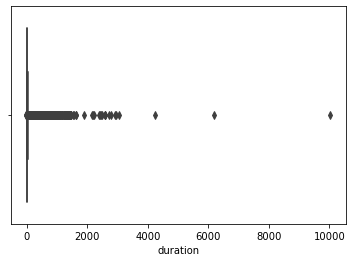

In [7]:
sns.boxplot(x=df_jan23["duration"])

In [8]:
before = df_jan23.duration.count()

In [9]:
df_jan23_without_outliers = df_jan23[(df_jan23.duration >=1) & (df_jan23.duration <=60)]

<AxesSubplot:xlabel='duration'>

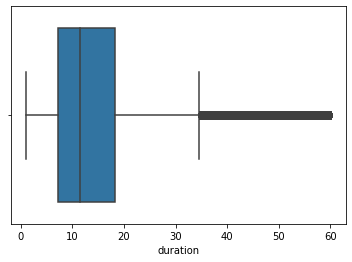

In [10]:
sns.boxplot(x=df_jan23_without_outliers["duration"])

In [11]:
after = df_jan23_without_outliers.duration.count()

In [12]:
(after / before) * 100

98.1220282212598

In [13]:
df_jan23_without_outliers.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'duration'],
      dtype='object')

In [14]:
df_jan23_without_outliers[['PULocationID', 'DOLocationID']] = df_jan23_without_outliers[['PULocationID', 'DOLocationID']].astype(str)  

dv = DictVectorizer()
train_dicts = df_jan23_without_outliers[['PULocationID', 'DOLocationID']].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts) 

In [15]:
X_train.shape[1]

515

In [16]:
target = 'duration'
y_train = df_jan23_without_outliers[target].values

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mean_squared_error(y_train, y_pred, squared=False)

7.649261027792376

In [18]:
df_feb23["duration"] = df_feb23['tpep_dropoff_datetime'] - df_feb23['tpep_pickup_datetime']
df_feb23['duration'] = df_feb23["duration"].progress_apply(lambda td: td.total_seconds()/60)

df_feb23_without_outliers = df_feb23[(df_feb23.duration >=1) & (df_feb23.duration <=60)]

df_feb23_without_outliers[['PULocationID', 'DOLocationID']] = df_feb23_without_outliers[['PULocationID', 'DOLocationID']].astype(str)  
validation_dicts = df_feb23_without_outliers[['PULocationID', 'DOLocationID']].to_dict(orient='records')
X_validation = dv.transform(validation_dicts)

y_validation = df_feb23_without_outliers['duration'].values
y_prediction = model.predict(X_validation)
mean_squared_error(y_validation, y_prediction, squared=False)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2913955/2913955 [00:16<00:00, 171807.24it/s]


7.811832836304415